In [1]:
import json
from shapely.ops import cascaded_union
from rasterio.plot import plotting_extent
import pandas as pd
from shapely.geometry import Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
import os
import fiona.crs

In [2]:
import os
os.getcwd() 

'/Users/purgatorid/Documents/GitHub/canopy-gis/processing'

In [3]:
path = os.getcwd()

In [4]:
path

'/Users/purgatorid/Documents/GitHub/canopy-gis/processing'

In [14]:
new_path = "/Volumes/Lacie/zhenyadata/Project_Canopy_Data/PC_Data/Sentinel_Data/Labelled/Tiles_v3/Polygon_List/polygons_101320.csv"
df = pd.read_csv(new_path)
df_labels = df[["center-lat","center-long","polygon"]]

In [15]:
df_labels

,center-lat,center-long,polygon
0,5.77459,9.16861,"{""type"":""Polygon"",""coordinates"":[[[9.088783,5...."
1,5.75499,8.92339,"{""type"":""Polygon"",""coordinates"":[[[8.891888,5...."
2,5.59555,13.18814,"{""type"":""Polygon"",""coordinates"":[[[13.148403,5..."
3,5.35518,14.33673,"{""type"":""Polygon"",""coordinates"":[[[14.34763,5...."
4,5.33908,13.10411,"{""type"":""Polygon"",""coordinates"":[[[13.02927,5...."
...,...,...,...
96,-2.70602,18.07841,"{""type"":""Polygon"",""coordinates"":[[[18.066158,-..."
97,-2.85049,19.19509,"{""type"":""Polygon"",""coordinates"":[[[19.173546,-..."
98,-3.08219,19.18118,"{""type"":""Polygon"",""coordinates"":[[[19.272423,-..."
99,-3.08245,19.16616,"{""type"":""Polygon"",""coordinates"":[[[19.246502,-..."


In [16]:
polygons = []
for polygon in df_labels["polygon"]:
    polygon_temp = []
    for coordinates in json.loads(polygon)["coordinates"]:
        for coordinate in coordinates:
            polygon_temp.append(tuple(coordinate))
        polygons.append(Polygon(polygon_temp))


In [17]:
gdf_series = gpd.GeoSeries(polygons)

In [18]:
gdf_series

0      POLYGON ((9.08878 5.75315, 9.17925 5.70311, 9....
1      POLYGON ((8.89189 5.80456, 8.93188 5.80302, 8....
2      POLYGON ((13.14840 5.59719, 13.19990 5.62265, ...
3      POLYGON ((14.34763 5.34181, 14.35965 5.35079, ...
4      POLYGON ((13.02927 5.42701, 13.10274 5.42769, ...
                             ...                        
96     POLYGON ((18.06616 -2.71119, 18.06624 -2.70772...
97     POLYGON ((19.17355 -2.85123, 19.20582 -2.83863...
98     POLYGON ((19.27242 -3.13435, 19.15277 -3.13572...
99     POLYGON ((19.24650 -3.12663, 19.24650 -3.08275...
100    POLYGON ((18.62080 -3.18491, 18.96566 -3.18114...
Length: 101, dtype: geometry

In [23]:
gdf_series.to_file("/Volumes/Lacie/zhenyadata/Project_Canopy_Data/PC_Data/Geometry/labelled_boxes/v3/labels.shp")

# Combining Polygons Into a single MultiPolygon

In [10]:
boundary = gpd.GeoSeries(cascaded_union(polygons))

<AxesSubplot:>

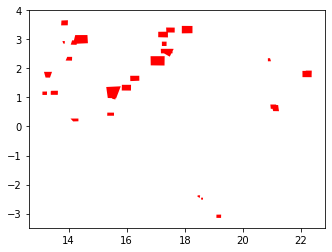

In [13]:
boundary.plot(color = 'red')

In [14]:
boundary

0    MULTIPOLYGON (((19.09029 -3.03715, 19.25251 -3...
dtype: geometry

In [87]:
boundary.to_file("/Users/user/Documents/GitHub/canopy-gis/data_collection/data/labelled/labels_v1.shp")

# Check for Intersecting Polygons

# Crop Raster from Polygon

In [16]:
import os
import numpy as np
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
# import cartopy as cp

# optional - turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
test_raster = "/Volumes/Lacie/zhenyadata/Project_Canopy_Data/PC_Data/Sentinel_Data/Test/MISC/Test_w_shape_file.tif"
test_shape = "/Volumes/Lacie/zhenyadata/Project_Canopy_Data/PC_Data/Geometry/test_polygon_extraction/test.shp"

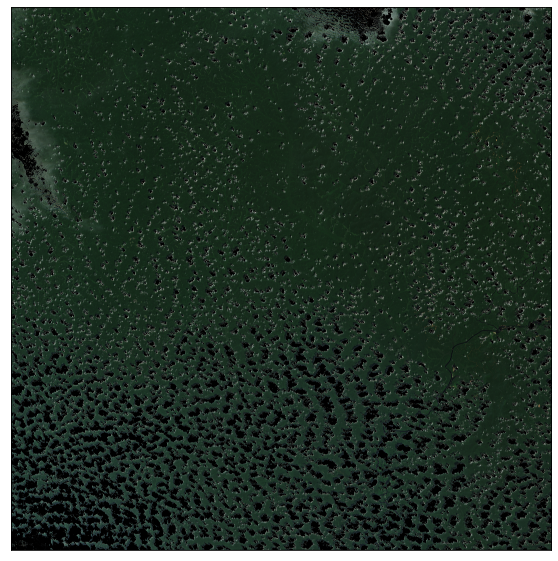

In [18]:
with rio.open(test_raster) as src:
    lidar_chm_im = src.read()
    extent = rio.plot.plotting_extent(src)
    soap_profile = src.profile

ep.plot_rgb(lidar_chm_im)
plt.show()

In [19]:
crop_extent_soap = gpd.read_file(test_shape)

In [20]:
crop_extent_soap.loc[[0],"geometry"]

0    POLYGON ((12.88218 1.46884, 12.98648 1.41023, ...
Name: geometry, dtype: geometry

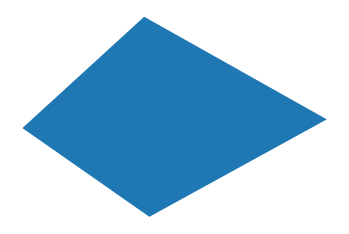

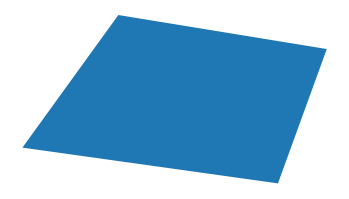

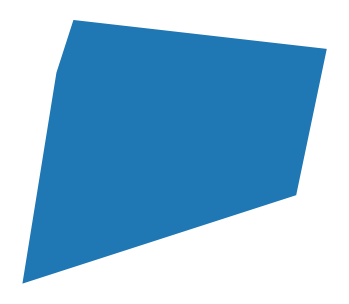

In [21]:
for index in range(crop_extent_soap.shape[0]):
    crop_extent = crop_extent_soap.loc[[index],"geometry"]
    
    # plot each extent
    fig, ax = plt.subplots(figsize = (6, 6))
    crop_extent.plot(ax=ax)
    ax.set_axis_off();

In [88]:
crop_extent_soap = crop_extent_soap.head(1)

In [89]:
print('crop extent crs: ', crop_extent_soap.crs)
print('lidar crs: ', soap_profile['crs'])

crop extent crs:  epsg:4326
lidar crs:  EPSG:4326


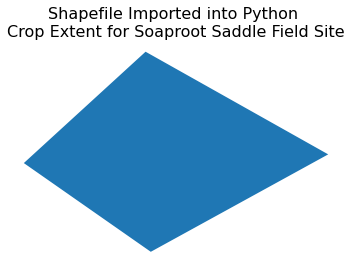

In [91]:
# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
crop_extent_soap.plot(ax=ax)
ax.set_title("Shapefile Imported into Python \nCrop Extent for Soaproot Saddle Field Site", 
             fontsize = 16)
ax.set_axis_off();

In [92]:
crop_extent_soap.head(1)

,id,geometry
0,1.0,"POLYGON ((12.88218 1.46884, 12.98648 1.41023, ..."


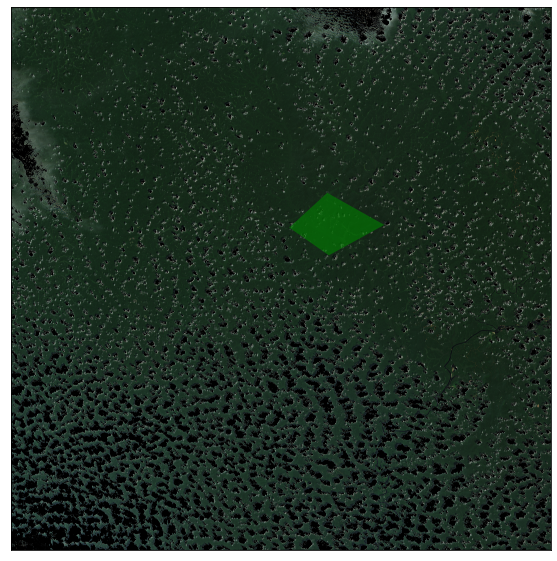

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_rgb(lidar_chm_im,
              extent=extent,
              ax=ax)
crop_extent_soap.plot(ax=ax, alpha=.6, color='g');

In [94]:
crop_extent_soap

,id,geometry
0,1.0,"POLYGON ((12.88218 1.46884, 12.98648 1.41023, ..."


In [95]:
with rio.open(test_raster) as src:
    lidar_chm_crop, soap_lidar_meta = es.crop_image(src, crop_extent_soap)

In [96]:
# Update the metadata to have the new shape (x and y and affine information)
soap_lidar_meta.update({"driver": "GTiff",
                 "height": lidar_chm_crop.shape[0],
                 "width": lidar_chm_crop.shape[1],
                 "transform": soap_lidar_meta["transform"]})

# generate an extent for the newly cropped object for plotting
cr_ext = rio.transform.array_bounds(soap_lidar_meta['height'], 
                                            soap_lidar_meta['width'], 
                                            soap_lidar_meta['transform'])

bound_order = [0,2,1,3]
cr_extent = [cr_ext[b] for b in bound_order]
cr_extent, crop_extent_soap.total_bounds

([12.81260764059288,
  12.926962410267457,
  1.4686467943308843,
  1.4689171365760543],
 array([12.8126404 ,  1.3546062 , 12.98647782,  1.46884222]))

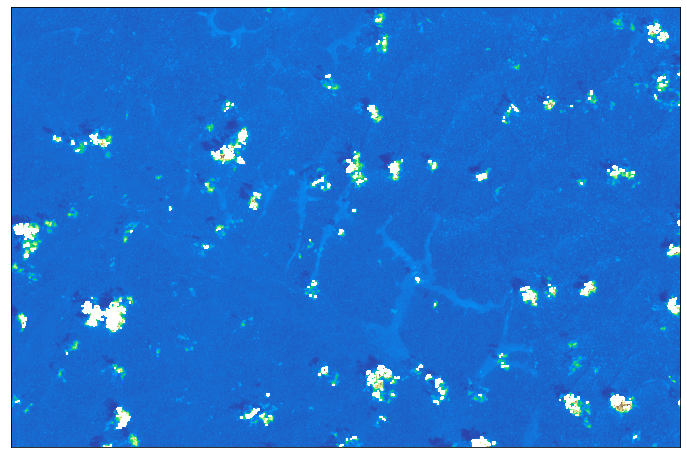

In [201]:
# mask the nodata and plot the newly cropped raster layer
lidar_chm_crop_ma = np.ma.masked_equal(lidar_chm_crop[0], 0) 
ep.plot_bands(lidar_chm_crop_ma, cmap='terrain', cbar=False);

# Extract Polygon Images from Full Raster

In [23]:
gdf = gpd.GeoDataFrame(gdf_series,geometry=0)

In [24]:
gdf["geometry"] = gdf[0]

In [25]:
gdf = gdf.drop(columns=[0])

In [31]:
master_raster_v2 = "/Volumes/Lacie/zhenyadata/Project_Canopy_Data/PC_Data/Sentinel_Data/Labelled/Tiles_v2_Misha/Master_Rasters/msk_geotiff_full.tif"
polygon_list = gdf

In [53]:
with rio.open(master_raster_v2) as src:
    master_rast = src.read()
    extent = rio.plot.plotting_extent(src)
    soap_profile = src.profile

# ep.plot_rgb(lidar_chm_im)
# plt.show()

In [54]:
master_rast.shape

(3, 91277, 117390)

In [12]:
extent

(12.301795038, 22.887219777, -3.7072657920000003, 4.523467779)

In [13]:
soap_profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 117390, 'height': 91277, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(9.017313858931765e-05, 0.0, 12.301795038,
       0.0, -9.017313858912979e-05, 4.523467779), 'tiled': False, 'interleave': 'pixel'}

In [51]:
crop_extent

0    POLYGON ((17.17386 2.67454, 17.57898 2.67591, ...
Name: geometry, dtype: geometry

In [32]:
src_raster_file = rio.open(master_raster_v2)

In [59]:
cropped_image = es.crop_image(src_raster_file, crop_extent)

In [64]:
cropped_image[0].shape

(3, 1743, 4493)

In [33]:
out_base_path = "/Volumes/Lacie/zhenyadata/Project_Canopy_Data/PC_Data/Sentinel_Data/Labelled/Tiles_v2_Misha/Polygon_Crops/MSK/Individual_Polygons/"
for index in range(gdf.shape[0]):
    crop_extent = gdf.loc[[index],"geometry"]
    
#     # plot each extent
#     fig, ax = plt.subplots(figsize = (6, 6))
#     crop_extent.plot(ax=ax)
#     ax.set_axis_off();
    
    raster_crop, raster_meta = es.crop_image(src_raster_file, crop_extent)
        
#     # Update the metadata to have the new shape (x and y and affine information)
    raster_meta.update({"driver": "GTiff",
                     "height": raster_crop.shape[1],
                     "width": raster_crop.shape[2],
                     "transform": raster_meta["transform"]})

    # generate an extent for the newly cropped object for plotting
    cr_ext = rio.transform.array_bounds(raster_meta['height'], 
                                                raster_meta['width'], 
                                                raster_meta['transform'])

    bound_order = [0,2,1,3]
    cr_extent = [cr_ext[b] for b in bound_order]
#     print(cr_extent,raster_meta)
#     print(raster_meta)
#     print(cr_extent, crop_extent.total_bounds)
    
    # mask the nodata and plot the newly cropped raster layer
    raster_crop_ma = np.ma.masked_equal(raster_crop, 0) 
#     print(raster_crop_ma.shape)
#     ep.plot_rgb(raster_crop_ma);
    
#     # output_path
    outpath = out_base_path + str(index+1) + '.tif' 
    
#     # Export cloud-masked TCI file
    with rio.open(outpath, 'w', **raster_meta) as outf:
            outf.write(raster_crop_ma)

In [34]:
master_raster_v2

'/Volumes/Lacie/zhenyadata/Project_Canopy_Data/PC_Data/Sentinel_Data/Labelled/Tiles_v2_Misha/Master_Rasters/msk_geotiff_full.tif'

In [90]:
help(rio.transform.array_bounds)

Help on function array_bounds in module rasterio.transform:

array_bounds(height, width, transform)
    Return the bounds of an array given height, width, and a transform.
    
    Return the `west, south, east, north` bounds of an array given
    its height, width, and an affine transform.



In [82]:
soap_profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 117390, 'height': 91277, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(9.017313858931765e-05, 0.0, 12.301795038,
       0.0, -9.017313858912979e-05, 4.523467779), 'tiled': False, 'interleave': 'pixel'}

In [87]:
raster_meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 756,
 'height': 3,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(9.017313858931765e-05, 0.0, 18.561163453177485,
        0.0, -9.017313858912979e-05, -2.452596741670848)}

# Polygon Metrics

In [119]:
for index in range(gdf.shape[0]):
    crop_extent = gdf.loc[[index],"geometry"]

In [126]:
gdf_2 = gdf.copy()

In [160]:
gdf_2.crs = fiona.crs.from_epsg(4326)

In [161]:
gdf_2.crs

<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [162]:
# gdf_2["area"] = gdf_2['geometry'].area

In [163]:
# gdf_2['rounded_area'] = gdf_2['area'].apply(lambda x: round(x, 2))

In [174]:
import pyproj    
import shapely
import shapely.ops as ops
from functools import partial

area_km_sq = []

for item in gdf_2.itertuples():
    geom = item[1]
    geom_area = ops.transform(
    partial(
        pyproj.transform,
        pyproj.Proj(init='EPSG:4326'),
        pyproj.Proj(
            proj='aea',
            lat_1=geom.bounds[1],
            lat_2=geom.bounds[3])),
    geom)

#     Print the area in m^2
#     print(geom)
#     print(geom_area.area / 10**6)
    area_km_sq.append(geom_area.area / 10**6)
    
gdf_2["area"] = area_km_sq

In [182]:
sum(gdf_2["area"] * .05)

902.9024501552371

In [184]:
sum(gdf_2["area"] * .05) / len(gdf_2["area"])

27.36068030773446

In [186]:
import statistics as st

st.median(gdf_2["area"])

341.6843820194834

In [187]:
gdf_2["area"]

0      768.490309
1      341.684382
2      610.795709
3     1143.580833
4      791.288847
5      120.649888
6      308.674877
7      242.719858
8      840.909457
9      290.926504
10     551.053158
11     296.349528
12     883.749019
13    1881.387503
14     338.027577
15     117.220950
16     208.053424
17    1921.413591
18     769.437124
19     680.893613
20     305.208691
21     273.344004
22     307.305640
23     354.362819
24    1669.920997
25     473.224992
26      71.903675
27     521.498681
28     399.094987
29     226.938686
30     223.478392
31      71.361290
32      53.100000
Name: area, dtype: float64

In [188]:
2000 / 27

74.07407407407408